In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
import numpy as np
sns.set_palette('colorblind')

In [4]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [5]:
data = pd.read_csv('winequality-red.csv')

In [6]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
data = data.dropna()

In [8]:
varaibles_for_model = pd.DataFrame()

# Exploratory data analysis of dataset

## Quality of wines

[Text(0.5, 0, 'Quality of wine')]

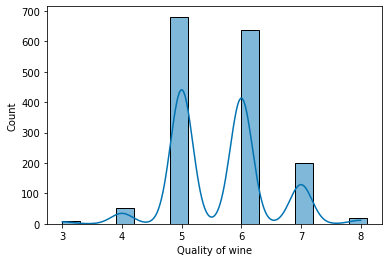

In [9]:
quality = data['quality']
fig = sns.histplot(quality,binwidth=0.3, kde= True );
fig.set(xlabel='Quality of wine')

In [10]:

print(f'Mean quality of wines in dataset is {quality.mean().round(2)} and median is {quality.median().round(2)}')

Mean quality of wines in dataset is 5.64 and median is 6.0


##### Most wines are medicore with quality label around 5/6.

## Relationship beetwen wine characteristics and wine quality

## fixed acidity 

[Text(0.5, 0, 'fixed acidity')]

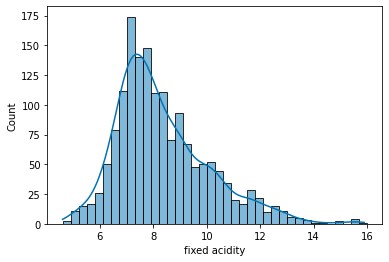

In [11]:
fixed_acidity = data['fixed acidity']
fig = sns.histplot(fixed_acidity,binwidth=0.3, kde= True );
fig.set(xlabel='fixed acidity')

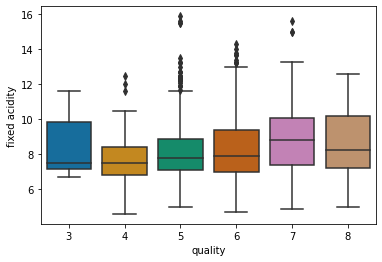

In [12]:
sns.boxplot(data=data, y = 'fixed acidity', x = 'quality')
acidity = data['fixed acidity']

In [13]:
print(f'Mean fixed acidity of wines in dataset is {acidity.mean().round(2)} and median is {acidity.median().round(2)}. Cramers V of fixed acidity and quality is equal to {cramers_v(acidity ,quality).round(2)}')

Mean fixed acidity of wines in dataset is 8.32 and median is 7.9. Cramers V of fixed acidity and quality is equal to 0.18


There is weak association beetwen variables. Thus i won't use it in my model.

## volatile acidity

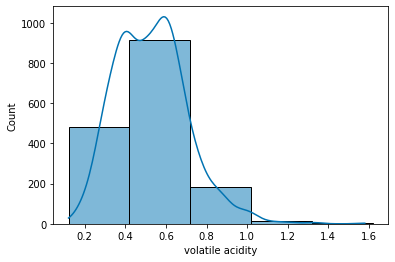

In [14]:
volatile_acidity = data['volatile acidity']
fig = sns.histplot(volatile_acidity,binwidth=0.3, kde= True );
fig.set(xlabel='volatile acidity')

volatile_acidity = data['volatile acidity']

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

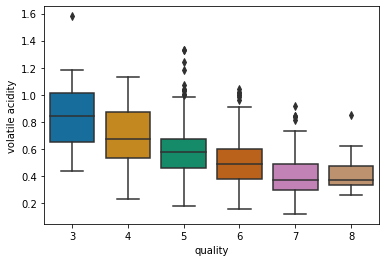

In [15]:
sns.boxplot(data=data, y = 'volatile acidity', x = 'quality')

In [16]:
print(f'Mean volatile acidity of wines in dataset is {volatile_acidity.mean().round(2)} and median is {volatile_acidity.median().round(2)}. Cramers V of volatile acidity and quality is equal to {cramers_v(volatile_acidity ,quality).round(2)}')

Mean volatile acidity of wines in dataset is 0.53 and median is 0.52. Cramers V of volatile acidity and quality is equal to 0.33


Since there is moderate association beetwen variables i will use it in my predictions of wine quality.

In [17]:
varaibles_for_model['volatile_acidity'] = data['volatile acidity']

## citric acid

[Text(0.5, 0, 'citric acid')]

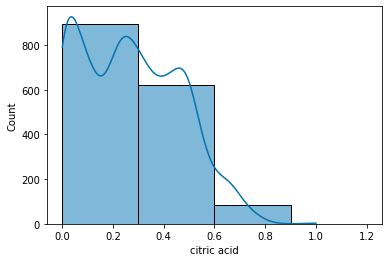

In [18]:
citric_acid = data['citric acid']
fig = sns.histplot(citric_acid,binwidth=0.3, kde= True );
fig.set(xlabel='citric acid')

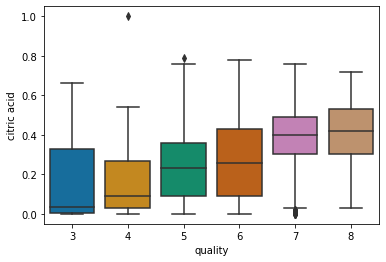

In [19]:
sns.boxplot(data=data, y = 'citric acid', x = 'quality')

citric_acid = data['citric acid']

In [20]:
print(f'Mean citric acid of wines in dataset is {citric_acid.mean().round(2)} and median is {citric_acid.median().round(2)}. Cramers V of citric acid and quality is equal to {cramers_v(citric_acid ,quality).round(2)}')

Mean citric acid of wines in dataset is 0.27 and median is 0.26. Cramers V of citric acid and quality is equal to 0.19


Cramers V has weak association with quality for now we might use it in model.

In [21]:
varaibles_for_model['citric_acid'] = data['citric acid']

## residual sugar

[Text(0.5, 0, 'residual sugar')]

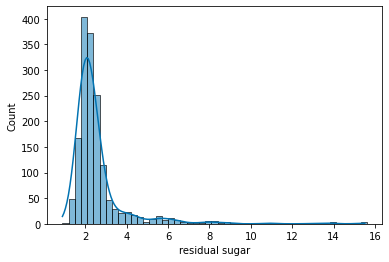

In [22]:
sugar = data['residual sugar']
fig = sns.histplot(sugar,binwidth=0.3, kde= True );
fig.set(xlabel='residual sugar')

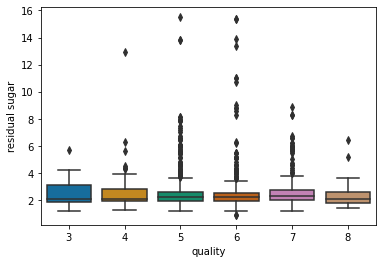

In [23]:
sns.boxplot(data=data, y = 'residual sugar', x = 'quality')
sugar = data['residual sugar']

In [24]:
print(f'Mean residual sugar of wines in dataset is {sugar.mean().round(2)} and median is {sugar.median().round(2)}. Cramers V of residual sugar and quality is equal to {cramers_v(sugar ,quality).round(2)}')

Mean residual sugar of wines in dataset is 2.54 and median is 2.2. Cramers V of residual sugar and quality is equal to 0.23


Same here, weak association for now I will use it.

In [25]:
varaibles_for_model['residual_sugar'] = data['residual sugar']

## chlorides

[Text(0.5, 0, 'chlorides')]

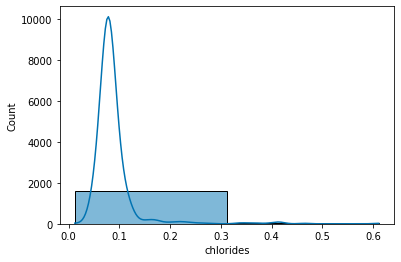

In [26]:
chlorides = data['chlorides']
fig = sns.histplot(chlorides,binwidth=0.3, kde= True );
fig.set(xlabel='chlorides')

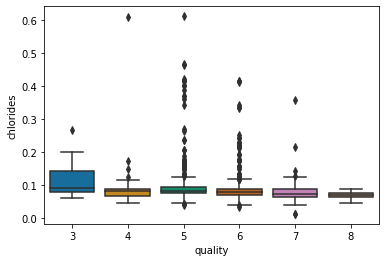

In [27]:
sns.boxplot(data=data, y = 'chlorides', x = 'quality')
chlorides = data['chlorides']

In [28]:
print(f'Mean chlorides of wines in dataset is {chlorides.mean().round(2)} and median is {chlorides.median().round(2)}. Cramers V of chlorides and quality is equal to {cramers_v(chlorides ,quality).round(2)}')

Mean chlorides of wines in dataset is 0.09 and median is 0.08. Cramers V of chlorides and quality is equal to 0.27


In [29]:
varaibles_for_model['chlorides'] = data['chlorides']

## free sulfur dioxide

[Text(0.5, 0, 'Free sulfur dioxide')]

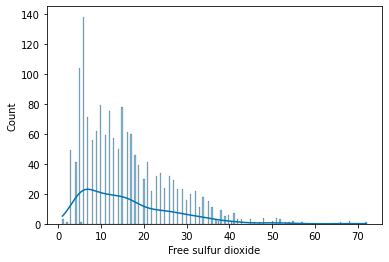

In [30]:
free = data['free sulfur dioxide']
fig = sns.histplot(free,binwidth=0.3, kde= True );
fig.set(xlabel='Free sulfur dioxide')

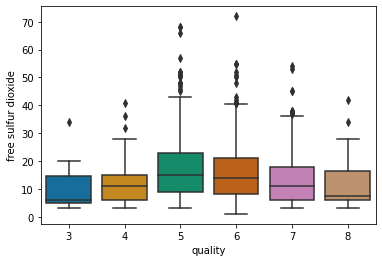

In [31]:
sns.boxplot(data=data, y = 'free sulfur dioxide', x = 'quality')
sulfur = data['free sulfur dioxide']

In [32]:
print(f'Mean free sulfur dioxide of wines in dataset is {sulfur.mean().round(2)} and median is {sulfur.median().round(2)}. Cramers V of free sulfur dioxide and quality is equal to {cramers_v(sulfur ,quality).round(2)}')

Mean free sulfur dioxide of wines in dataset is 15.87 and median is 14.0. Cramers V of free sulfur dioxide and quality is equal to 0.05


Won't use it.

## total sulfur dioxide

[Text(0.5, 0, 'Total sulfur dioxide')]

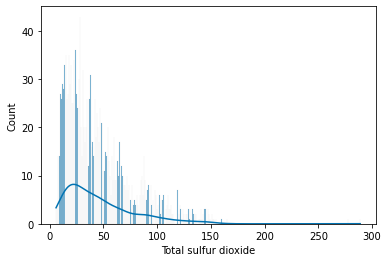

In [33]:
sulfur_dioxide = data['total sulfur dioxide']
fig = sns.histplot(sulfur_dioxide,binwidth=0.3, kde= True );
fig.set(xlabel='Total sulfur dioxide')

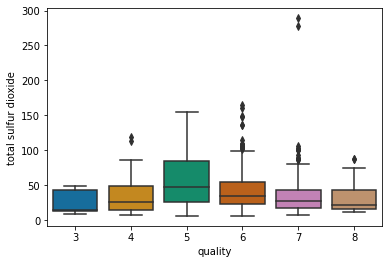

In [34]:
sns.boxplot(data=data, y = 'total sulfur dioxide', x = 'quality')
sulfur_1 = data['total sulfur dioxide']

In [35]:
print(f'Mean free sulfur dioxide of wines in dataset is {sulfur.mean().round(2)} and median is {sulfur.median().round(2)}. Cramers V of free sulfur dioxide and quality is equal to {cramers_v(sulfur ,quality).round(2)}')

Mean free sulfur dioxide of wines in dataset is 15.87 and median is 14.0. Cramers V of free sulfur dioxide and quality is equal to 0.05


## Density

[Text(0.5, 0, 'Quality of wine')]

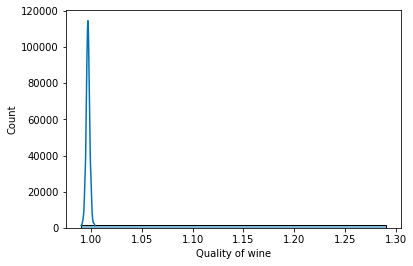

In [36]:
density = data['density']
fig = sns.histplot(density,binwidth=0.3, kde= True );
fig.set(xlabel='Quality of wine')

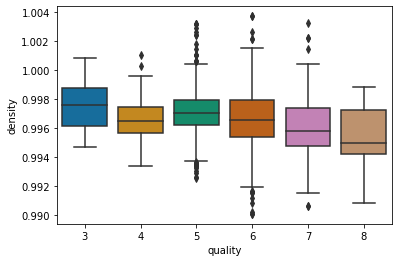

In [37]:
sns.boxplot(data=data, y = 'density', x = 'quality')
density = data['density']

In [38]:
print(f'Mean density of wines in dataset is {density.mean().round(2)} and median is {density.median().round(2)}. Cramers V of density and quality is equal to {cramers_v(density ,quality).round(2)}')

Mean density of wines in dataset is 1.0 and median is 1.0. Cramers V of density and quality is equal to 0.33


In [39]:
varaibles_for_model['density'] = data['density']

## pH

[Text(0.5, 0, 'pH of wine')]

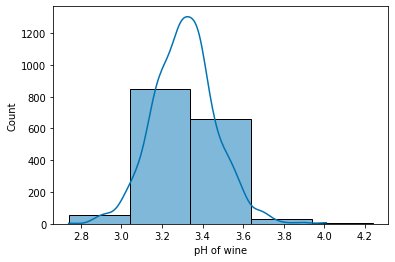

In [40]:
pH = data['pH']
fig = sns.histplot(pH,binwidth=0.3, kde= True );
fig.set(xlabel='pH of wine')

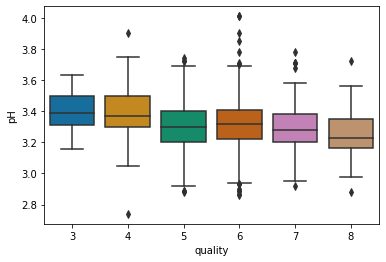

In [41]:
sns.boxplot(data=data, y = 'pH', x = 'quality')	
ph = data['pH']	

In [42]:
print(f'Mean ph of wines in dataset is {ph.mean().round(2)} and median is {ph.median().round(2)}. Cramers V of ph and quality is equal to {cramers_v(ph ,quality).round(2)}')

Mean ph of wines in dataset is 3.31 and median is 3.31. Cramers V of ph and quality is equal to 0.16


## Sulphates

[Text(0.5, 0, 'sulphates')]

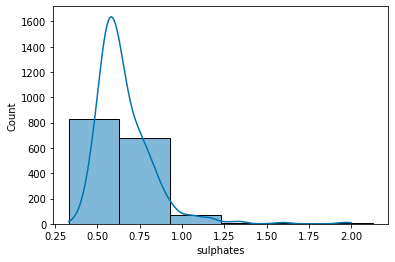

In [43]:
sulphates = data['sulphates']
fig = sns.histplot(sulphates,binwidth=0.3, kde= True );
fig.set(xlabel='sulphates')

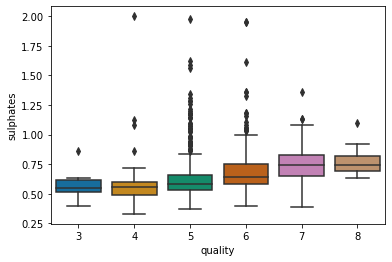

In [44]:
sns.boxplot(data=data, y = 'sulphates', x = 'quality')
sulphates = data['sulphates']

In [45]:
print(f'Mean sulphates of wines in dataset is {sulphates.mean().round(2)} and median is {sulphates.median().round(2)}. Cramers V of sulphates and quality is equal to {cramers_v(sulphates ,quality).round(2)}')

Mean sulphates of wines in dataset is 0.66 and median is 0.62. Cramers V of sulphates and quality is equal to 0.24


In [46]:
varaibles_for_model['sulphates'] = data['sulphates']

## alcohol

[Text(0.5, 0, 'Alcohol')]

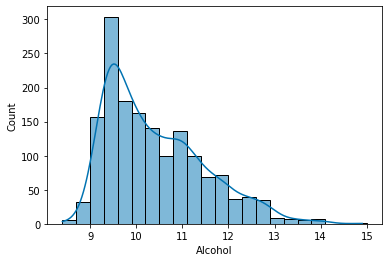

In [47]:
alcohol = data['alcohol']
fig = sns.histplot(alcohol ,binwidth=0.3, kde= True );
fig.set(xlabel='Alcohol')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

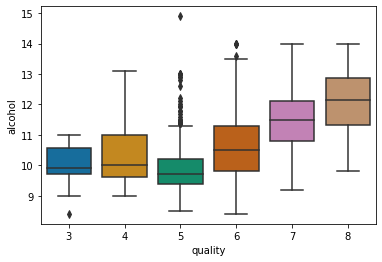

In [48]:
sns.boxplot(data=data, y = 'alcohol', x = 'quality')

In [49]:
print(f'Mean alcohol of wines in dataset is {alcohol.mean().round(2)} and median is {alcohol.median().round(2)}. Cramers V of alcohol and quality is equal to {cramers_v(alcohol ,quality).round(2)}')

Mean alcohol of wines in dataset is 10.42 and median is 10.2. Cramers V of alcohol and quality is equal to 0.32


In [50]:
varaibles_for_model['alcohol'] = data['alcohol']

# Model 

In [51]:
varaibles_for_model.head()

,volatile_acidity,citric_acid,residual_sugar,chlorides,density,sulphates,alcohol
0,0.70,0.00,1.9,0.076,0.9978,0.56,9.4
1,0.88,0.00,2.6,0.098,0.9968,0.68,9.8
2,0.76,0.04,2.3,0.092,0.9970,0.65,9.8
3,0.28,0.56,1.9,0.075,0.9980,0.58,9.8
4,0.70,0.00,1.9,0.076,0.9978,0.56,9.4


### XGB Classifier

In [52]:
import xgboost
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [53]:
X_train,X_test,y_train,y_test = train_test_split(
    varaibles_for_model, quality, test_size=0.2, random_state=42)

In [54]:
pipe = make_pipeline(StandardScaler(),xgboost.XGBClassifier())

pipe.fit(X_train, y_train)
predicted = pipe.predict(X_test)

C:\Users\Krzysztof\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted) 

0.653125

Test score: 0.653125 


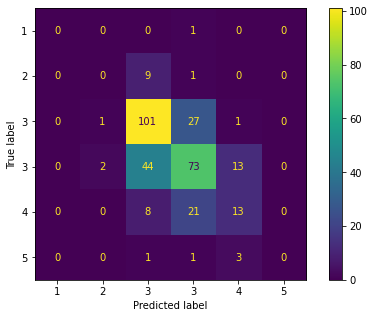

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, predicted),
    display_labels=["1", "2", "3", "3", "4", "5"
    ],
)

print(f'Test score: {pipe.score(X_test,y_test)} ')
cmp.plot(ax=ax)
plt.show();

### KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier


In [58]:
X_train,X_test,y_train,y_test = train_test_split(
    varaibles_for_model, quality, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

Test score: 0.584375 


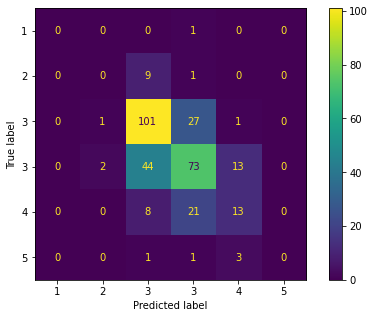

In [68]:
knn.fit(X_train, y_train)

predicted = knn.predict(X_test)

fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, predicted),
    display_labels=["1", "2", "3", "3", "4", "5"
    ],
)

print(f'Test score: {knn.score(X_test,y_test)} ')

cmp.plot(ax=ax)
plt.show();


Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)



Test score: 0.54375 


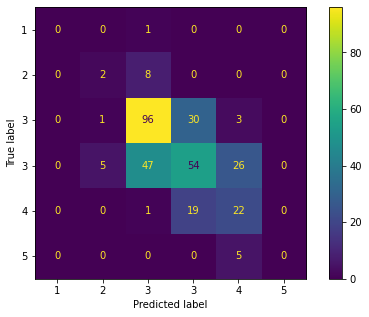

In [67]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, predicted),
    display_labels=["1", "2", "3", "3", "4", "5"
    ],
)

print(f'Test score: {clf.score(X_test,y_test)} ')

cmp.plot(ax=ax)
plt.show();
